In [1]:
!pip install kagglehub

In [2]:
import kagglehub

# Download the latest version of the dataset
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /home/codespace/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


In [3]:
import pandas as pd
import os

# Build full path to the CSV file
csv_file = os.path.join(
    "/home/codespace/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1",
    "WA_Fn-UseC_-Telco-Customer-Churn.csv"
)

# Load the CSV into a DataFrame
df = pd.read_csv(csv_file)

# Check the first few rows
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
 
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
 
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
 
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)
 
df.churn = (df.churn == 'yes').astype(int)

In [7]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
 
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
 
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values
 
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [8]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
 
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [9]:
dv = DictVectorizer(sparse=False)
 
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
 
model = LogisticRegression()
model.fit(X_train, y_train)

/opt/conda/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [10]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
 
y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

In [11]:
#Accuracy and dummy model
#We need to answear the question of 80% from previous prediction is good or not


In [12]:
len(y_val)

1409

In [13]:
#For all 1409 need to assign the score and make classification or decision

In [14]:
#How many correct decisions we make
(y_val == churn_decision).sum()

np.int64(1132)

In [15]:
#The accurancy is this number 1132 or the number of correct predictions devided by total = 1132/1409= 80%
1132/1409

0.8034066713981547

In [16]:
thresholds = np.linspace(0,1,21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [17]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f %.3f' % (t,score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.738
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.734
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


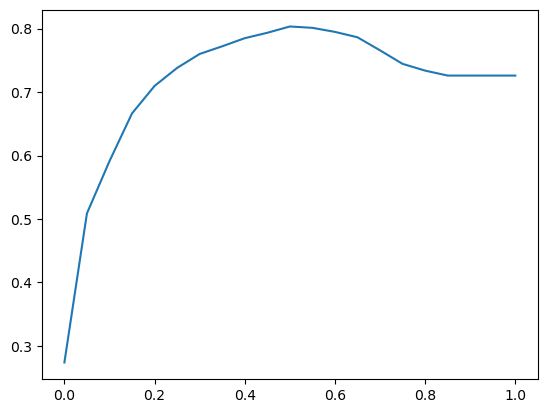

In [18]:
plt.plot(thresholds, scores)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_val, churn_decision)

0.7260468417317246

In [21]:
accuracy_score(y_val, y_pred>=0.5)

0.8034066713981547

In [22]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t,score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.738
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.734
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [23]:
#Cutomers are churning if the values are above 1.0. Those customers are not churning from above
y_pred >= 1.0

array([False, False, False, ..., False, False, False])

In [24]:
from collections import Counter

In [25]:
Counter(y_pred >= 1.0)

Counter({np.False_: 1409})

In [26]:
# CONFUSION TABLE
# Way of looking at different error that binary classification makes
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [27]:
actual_positive

array([False, False, False, ..., False,  True,  True])

In [28]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [29]:
predict_positive

array([False, False, False, ..., False,  True,  True])

In [30]:
# Combine them into one
predict_positive & actual_positive

array([False, False, False, ..., False,  True,  True])

In [31]:
tp = (predict_positive & actual_positive).sum()
tp

np.int64(210)

In [32]:
tn = (predict_negative & actual_negative).sum()
tn

np.int64(922)

In [33]:
fp = (predict_positive & actual_negative).sum()
fp

np.int64(101)

In [34]:
fn = (predict_negative & actual_positive).sum()
fn

np.int64(176)

In [35]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[922, 101],
       [176, 210]])

In [36]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

In [37]:
#Acuraccy is still 80%

In [38]:
# Precision and Recoll
# It is used to evaluate binary classf


In [39]:
(tp + tn) / (tp+tn+fn+fp)

np.float64(0.8034066713981547)

In [40]:
# Precision tell as how many positive predictions turn out to be correct
p = tp / (tp+fp)
p

np.float64(0.6752411575562701)

In [41]:
# We will send this promotinal email to 311 customers, but only 210 will actually churn, 33% are mistake
tp+fp

np.int64(311)

In [42]:
# Recall - Fraction of correctly indentify positive examples
r = tp / (tp+fn)
r

np.float64(0.5440414507772021)

In [43]:
#46% of people who are churning we will faill to indentify them
tp+fn

np.int64(386)

In [44]:
#ROC Curves
#Binary Clasification
tpr = tp/(tp+fn)
tpr

np.float64(0.5440414507772021)

In [46]:
fpr = fp/(fp+tn)
fpr

np.float64(0.09872922776148582)

In [47]:
#Fro all negtive examples 10% is predicted incorectly 

In [59]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))

In [60]:
scores

[(np.float64(0.0), np.int64(386), np.int64(1023), np.int64(0), np.int64(0)),
 (np.float64(0.01), np.int64(385), np.int64(912), np.int64(1), np.int64(111)),
 (np.float64(0.02), np.int64(384), np.int64(830), np.int64(2), np.int64(193)),
 (np.float64(0.03), np.int64(383), np.int64(766), np.int64(3), np.int64(257)),
 (np.float64(0.04), np.int64(381), np.int64(715), np.int64(5), np.int64(308)),
 (np.float64(0.05), np.int64(379), np.int64(685), np.int64(7), np.int64(338)),
 (np.float64(0.06), np.int64(377), np.int64(660), np.int64(9), np.int64(363)),
 (np.float64(0.07), np.int64(372), np.int64(641), np.int64(14), np.int64(382)),
 (np.float64(0.08), np.int64(371), np.int64(613), np.int64(15), np.int64(410)),
 (np.float64(0.09), np.int64(369), np.int64(580), np.int64(17), np.int64(443)),
 (np.float64(0.1), np.int64(366), np.int64(556), np.int64(20), np.int64(467)),
 (np.float64(0.11), np.int64(365), np.int64(528), np.int64(21), np.int64(495)),
 (np.float64(0.12), np.int64(365), np.int64(509), 

In [61]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns= columns)

In [62]:
df_scores

,threshold,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,912,1,111
2,0.02,384,830,2,193
3,0.03,383,766,3,257
4,0.04,381,715,5,308
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [63]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,366,556,20,467
20,0.2,333,356,53,667
30,0.3,284,236,102,787
40,0.4,249,166,137,857
50,0.5,210,101,176,922
60,0.6,150,53,236,970
70,0.7,76,20,310,1003
80,0.8,13,2,373,1021
90,0.9,0,0,386,1023


In [64]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp+df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp+df_scores.tn)

In [65]:
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,556,20,467,0.948187,0.543500
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,101,176,922,0.544041,0.098729
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,76,20,310,1003,0.196891,0.019550
80,0.8,13,2,373,1021,0.033679,0.001955
90,0.9,0,0,386,1023,0.000000,0.000000


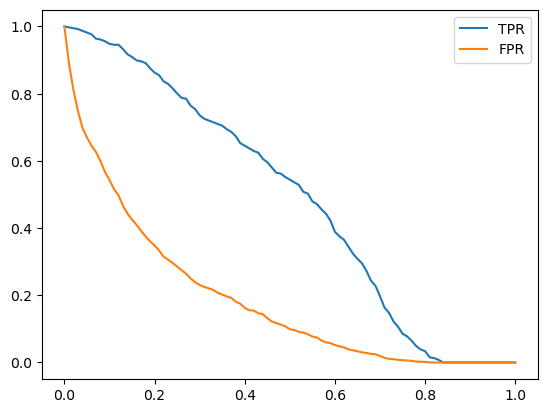

In [66]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()


In [67]:
#RANDOM MODEL

In [69]:
np.random.seed(1)
y_rand =np.random.uniform(0, 1, size=len(y_val))
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089])

In [70]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [71]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0, 1, 101)
    
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
    
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
    
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    df_scores['tpr'] = df_scores.tp / (df_scores.tp+df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp+df_scores.tn)

    return df_scores

In [72]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [73]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


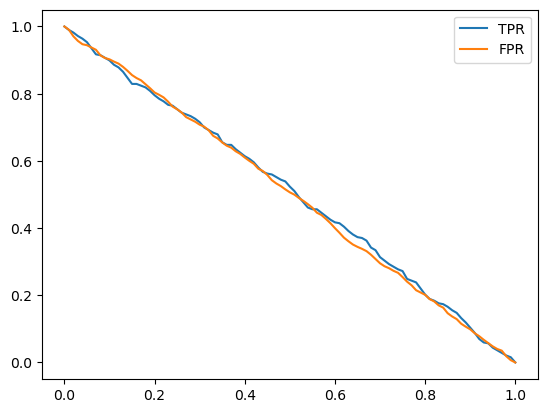

In [74]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()


In [75]:
# IDEAL MODEL
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(np.int64(1023), np.int64(386))

In [76]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [77]:
y_ideal_pred = np.linspace(0, 1, len(y_val))
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00])

In [81]:
#If we compared with accuracy and ideal one
((y_ideal_pred >= 0.726) == y_ideal).mean()

np.float64(1.0)

In [82]:
y_val.mean()

np.float64(0.2739531582682754)

In [83]:
1 - y_val.mean()

np.float64(0.7260468417317246)

In [84]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,386,1008,0,15,1.000000,0.985337
2,0.02,386,994,0,29,1.000000,0.971652
3,0.03,386,980,0,43,1.000000,0.957967
4,0.04,386,966,0,57,1.000000,0.944282
...,...,...,...,...,...,...,...
96,0.96,57,0,329,1023,0.147668,0.000000
97,0.97,43,0,343,1023,0.111399,0.000000
98,0.98,29,0,357,1023,0.075130,0.000000
99,0.99,15,0,371,1023,0.038860,0.000000


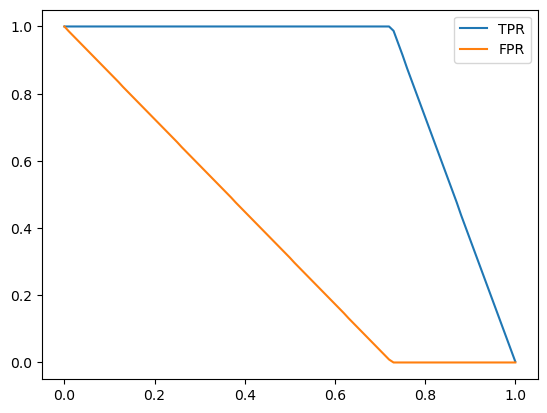

In [85]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()


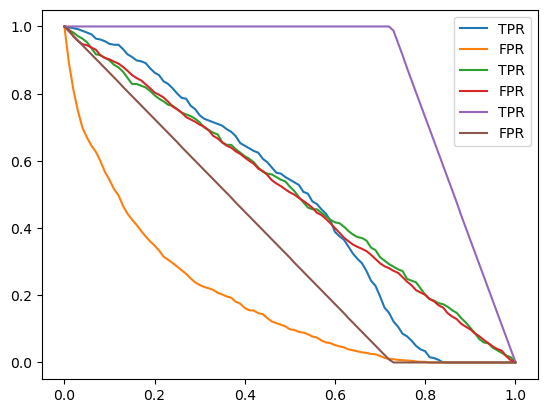

In [86]:
# PUT EVERYTHING TOGETHER
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')

plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')

plt.legend()


In [87]:
# The best model for thresholds for accuarcy is 0.5, but for ideal model is 0.72

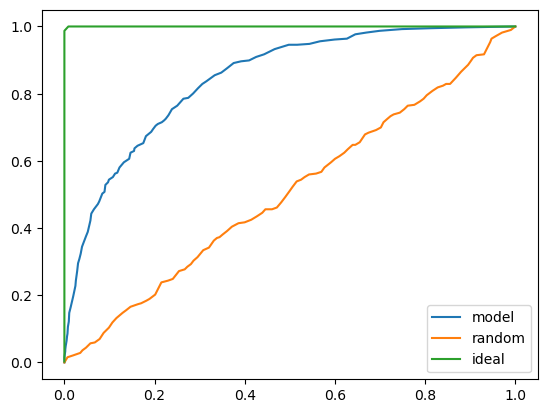

In [88]:
plt.plot(df_scores.fpr, df_scores.tpr, label ='model')
plt.plot(df_rand.fpr, df_rand.tpr, label ='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label ='ideal')

plt.legend()

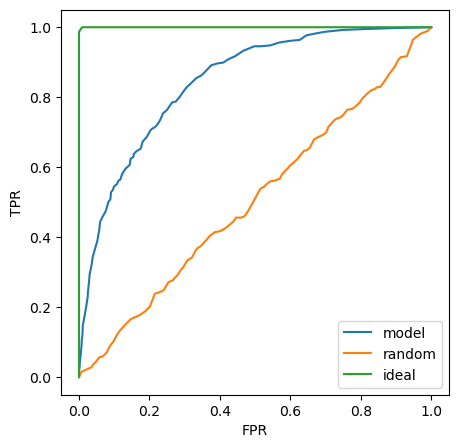

In [91]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label ='model')
plt.plot(df_rand.fpr, df_rand.tpr, label ='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label ='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [92]:
# Let’s begin in the lower-left corner, where both TPR and FPR are 0. This occurs at higher thresholds like 1.0. In this scenario, we predict that
# every customer is non-churning, resulting in TPR being 0 since we don’t predict anyone as churning. 
# FPR is also 0 because there are no false positives; we only have true negatives (TN).
# As we move from the lower left corner, where the threshold starts at 1.0, we eventually reach the upper-right corner with a threshold of 0.0. 
# Here, our model achieves 100% TPR because we predict everyone as churning, enabling us to identify all churning customers. However, 
# we also make many mistakes, incorrectly identifying non-churning customers. Thus, we have TPR = FPR = 100%.
# When we adjust the threshold, we predict more customers as churning, causing our TPR to increase, but the FPR also increases concurrently.
# The ROC curve allows us to observe how the model behaves at different thresholds. 
# Each point on the ROC curve represents TPR and FPR evaluated at a specific threshold. By plotting this curve, we can assess how far the model is
# from the ideal spot and how far it is from the random baseline. Additionally, the ROC curve is useful for comparing different models,
# as it’s easy to determine which one is superior (a model closer to the ideal spot is better, while one closer to the random baseline is worse).
# There is an interesting metric derived from the ROC curve known as AUC, which stands for the area under the curve.

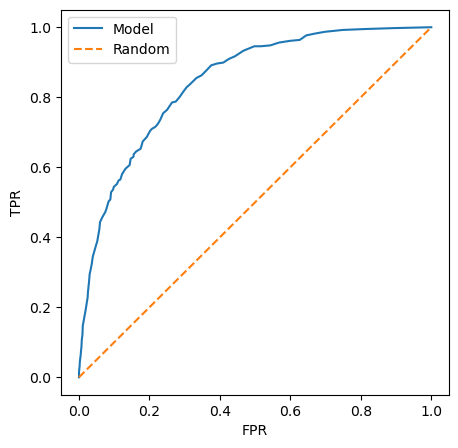

In [94]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label ='Model')
plt.plot([0, 1], [0,1], label ='Random', linestyle= '--')
#plt.plot(df_ideal.fpr, df_ideal.tpr, label ='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [95]:
from sklearn.metrics import roc_curve

In [96]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

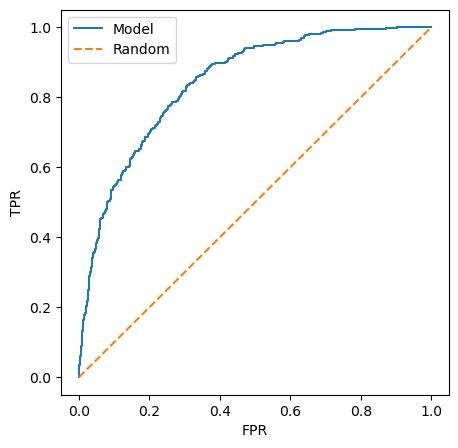

In [97]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label ='Model')
plt.plot([0, 1], [0,1], label ='Random', linestyle= '--')
#plt.plot(df_ideal.fpr, df_ideal.tpr, label ='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [98]:
# ROC AUC
# Area under te ROC curve
# We want to be as closed to ideal as posible
# TPR is 1 and FPR is 0 - Ideal Point
# Measuring area under the curve


In [99]:
from sklearn.metrics import auc

In [101]:
# This comutes area under the curve
auc(fpr, tpr)

0.843863167864505

In [102]:
auc(df_scores.fpr, df_scores.tpr)

0.8437795977491782

In [103]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999430203759136

In [107]:
#Compute area under ROC
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.843863167864505

In [108]:
from sklearn.metrics import roc_auc_score

In [109]:
roc_auc_score(y_val, y_pred)

0.843863167864505

In [110]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val ==1]

In [111]:
neg

array([0.0089869 , 0.20415901, 0.21189014, ..., 0.10795718, 0.31368258,
       0.13628728])

In [112]:
pos

array([0.54321479, 0.58226243, 0.46173939, 0.73963759, 0.06579694,
       0.69206063, 0.24743209, 0.69677469, 0.21175449, 0.66536343,
       0.47345383, 0.34856618, 0.15049193, 0.61774326, 0.76496132,
       0.14243873, 0.4332129 , 0.27327933, 0.06880668, 0.1925126 ,
       0.67076013, 0.4163547 , 0.66225934, 0.58328297, 0.52459988,
       0.43311478, 0.46853068, 0.35085633, 0.5681288 , 0.32183689,
       0.63542968, 0.743985  , 0.73868324, 0.60929208, 0.70897362,
       0.76501549, 0.10720975, 0.1806277 , 0.54193981, 0.57976751,
       0.43673026, 0.4407523 , 0.75732847, 0.38601859, 0.69459593,
       0.41801979, 0.7580938 , 0.302397  , 0.53408756, 0.58081929,
       0.15422181, 0.52980127, 0.78602784, 0.43633095, 0.67351546,
       0.77464411, 0.01262137, 0.35113544, 0.7979349 , 0.58503204,
       0.6741454 , 0.24813145, 0.34502001, 0.7019389 , 0.20971341,
       0.68617166, 0.63643199, 0.29123715, 0.66072855, 0.30815179,
       0.50170539, 0.27157439, 0.39736738, 0.41055246, 0.49965

In [113]:
import random

In [114]:
pos_ind = random.randint(0, len(pos)-1)
pos_ind

258

In [115]:
neg_ind = random.randint(0, len(neg)-1)
neg_ind

366

In [116]:
pos[pos_ind]> neg[neg_ind]

np.True_

In [117]:
n = 1000
success = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos)-1)
    neg_ind = random.randint(0, len(neg)-1)

    if pos[pos_ind]> neg[neg_ind]:
        success = success + 1

success / n
        

0.841

In [118]:
# We check 1000 times randomly score. We see in the end the total fraksion of all

In [124]:
n = 50000
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(pos), size=n)


In [125]:
pos_ind

array([355, 269, 258, ..., 344, 381, 219])

In [127]:
neg[neg_ind]

array([0.07529071, 0.00753089, 0.27502568, ..., 0.43203928, 0.17331496,
       0.46591033])

In [128]:
pos[pos_ind] > neg[neg_ind]

array([ True,  True, False, ..., False,  True,  True])

In [129]:
(pos[pos_ind] > neg[neg_ind]).mean()

np.float64(0.84782)

In [130]:
#CROSS VALIDATION
# Evoluatinh same model on different subset of data


In [132]:
def train(df_train, y_train):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression()
    model.fit(X_train,y_train)

    return dv, model
    

In [133]:
dv, model = train(df_train,y_train)

/opt/conda/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [134]:
def predict(df, dv, model):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    X = dv.transform(dicts)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred
    

In [135]:
y_pred = predict(df_val, dv, model)

In [136]:
from sklearn.model_selection import KFold

In [147]:
!pip install tqdm

In [156]:
from tqdm.auto import tqdm

In [148]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)



In [149]:
next(kfold.split(df_full_train))

(array([   0,    1,    2, ..., 5631, 5632, 5633]),
 array([   4,   21,   28,   33,   44,   58,   67,   72,   79,   81,   82,
          98,  101,  116,  119,  125,  126,  136,  141,  147,  161,  169,
         179,  192,  196,  200,  206,  214,  222,  231,  250,  255,  259,
         276,  280,  285,  301,  308,  313,  314,  325,  343,  354,  359,
         383,  386,  407,  420,  428,  433,  440,  447,  457,  473,  486,
         496,  501,  503,  507,  545,  554,  557,  566,  574,  580,  582,
         592,  605,  608,  623,  634,  636,  645,  662,  667,  684,  687,
         689,  729,  745,  758,  763,  778,  783,  792,  795,  808,  839,
         840,  847,  850,  858,  867,  870,  871,  881,  899,  906,  927,
         929,  931,  940,  943,  976,  984,  987,  988, 1005, 1016, 1028,
        1034, 1038, 1050, 1056, 1074, 1079, 1117, 1122, 1123, 1131, 1134,
        1139, 1144, 1155, 1159, 1163, 1169, 1179, 1198, 1206, 1216, 1238,
        1247, 1256, 1272, 1297, 1298, 1310, 1344, 1356, 1370,

In [150]:
train_idx, val_idx = next(kfold.split(df_full_train))

In [151]:
len(train_idx), len(val_idx)

(5070, 564)

In [152]:
len(df_full_train)

5634

In [153]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [154]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    X = dv.transform(dicts)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred
    

In [160]:
scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    y_train = df_train.churn.values
    y_val = df_val.churn.values
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

0it [00:00, ?it/s]

/opt/conda/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.htm

In [161]:
scores

[0.8478762145571935,
 0.8410426980198019,
 0.8557048652060528,
 0.8331906838943297,
 0.8277605459057072,
 0.8374125874125874,
 0.8428036470205145,
 0.8186195445920303,
 0.8455313472654512,
 0.8609962690329737]

In [162]:
np.mean(scores), np.std(scores)

(np.float64(0.8410938402906643), np.float64(0.011987864915953607))

In [169]:
# Cross Validation with added C
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train,y_train)

    return dv, model
    

In [170]:
dv, model = train(df_train,y_train, C=0.001)

In [171]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    X = dv.transform(dicts)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [172]:
n_splits = 5
for C in tqdm ([0, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    scores = []

    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        y_train = df_train.churn.values
        y_val = df_val.churn.values
    
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

        print('%s %.3f +- %.3f' % (C,np.mean(scores), np.std(scores)))

  0%|          | 0/8 [00:00<?, ?it/s]

InvalidParameterError: The 'C' parameter of LogisticRegression must be a float in the range (0.0, inf]. Got 0 instead.

In [173]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8583463334308341